# TP7 : color spaces and color images processing

The image processing practical exercises are carried out in Python3, using the [scikit-image](http://scikit-image.org/docs/stable/) library. The arrays (`ndarray`) used by this library to manipulate images come from the [numpy](https://docs.scipy.org/doc/) library. Images and other figures are displayed using [matplotlib](https://matplotlib.org/contents.html). The documentation for these three libraries will come in very handy.

In this lab, questions will be indicated in a **question** block, and answers will be given in the **answer** block below the question block. Your answers should be written in [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet). This will allow you to answer not only with text, but also with tables and images.

:::{important}
The questions asked in this TP generally **require short but justified answers**. A simple yes or no is of no use to us in judging your understanding of the question and its answer...
:::

:::{attention}
Sometimes there are several sub-questions in the same question. **Please remember to answer all sub-questions**.
:::

In [1]:
%pip install -q scikit-image scikit-learn opencv-python ipywidgets==8.1.1 matplotlib ipympl


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from skimage import io, util, filters, color, feature, transform, morphology
from time import time
import ipywidgets as widgets
from ipywidgets import interact

## Understanding the channels of different color spaces

Here we will try to modify globally image pixel values, so as to 'modify' the original image. We'll see if the color space used has an influence on our modifications.
Please notes that the range of values in different color spaces is different:
- RGB : all channels are in the range [0,1]
- Lab : L channel is in the range [0,100], a and b in the range [-100,100]
- HSV : all channels are in the range [0,1]

In [2]:
mandril=io.imread('../standard_test_images/mandril_color.png')/255

@interact( s1 = widgets.FloatSlider( min=-2, max=2.0, value=1.0, step=0.01, continuous_update = False),
          s2 = widgets.FloatSlider( min=-2, max=2.0, value=1.0, step=0.01, continuous_update = False),
          s3 = widgets.FloatSlider( min=-2, max=2.0, value=1.0, step=0.01, continuous_update = False),
         color_space = ['RGB', 'Lab', 'HSV'])
def rescale_channels( s1, s2, s3, color_space ):
    if color_space == 'RGB':
        img=mandril
    elif color_space == 'Lab':
        img=color.rgb2lab(mandril)
    elif color_space == 'HSV':
        img=color.rgb2hsv(mandril)
        
    res = img # MODIFY THIS LINE : multiply each color channel of the image by respectively s1, s2 and s3
    
    if color_space == 'RGB':
        res=res
    elif color_space == 'Lab':
        res=color.lab2rgb(res)
    elif color_space == 'HSV':
        res=color.hsv2rgb(res)
        
    fig = plt.figure()
    plt.imshow(res);
    plt.show()

interactive(children=(FloatSlider(value=1.0, continuous_update=False, description='s1', max=2.0, min=-2.0, ste…

**Question 1:**
- Complete the code above so as to multiply each color channel of the image by respectively s1, s2 and s3 
    - Ex: for a  RGB image we would have $R=s1.R$, $G=s2.G$ and $B=s3.B$
- For each color-space (RGB, Lab, HSV) check the effect of adjusting s1, s2 and s3. Comment on the role of each channel and effect of modifying these channels (beware that your modifications can lead to out of bounds values).

**Answer 1 :** YOUR ANSWER HERE

## Which color space is the "best" for a specific objective ?

In this part of the lab we'll ask you to perform a specific operation on an image using RGB, Lab and HSV color spaces. This way, you'll see how easy or difficult it is to perform some color transforms in each color space.

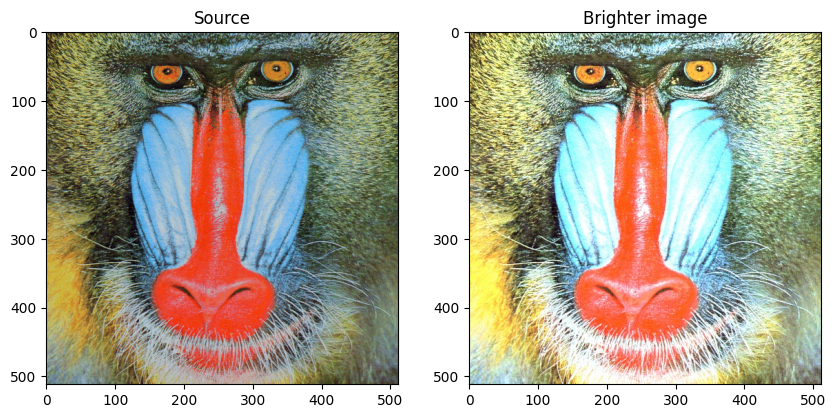

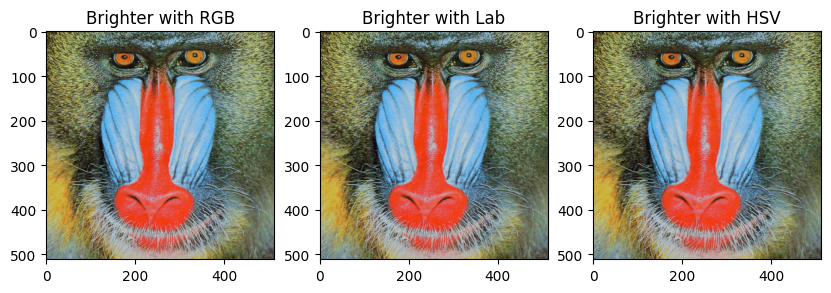

In [3]:
RGB_mandril=io.imread('../standard_test_images/mandril_color.png')/255
Lab_mandril=color.rgb2lab(mandril)
HSV_mandril=color.rgb2hsv(mandril)

mandril_brighter=io.imread('Images/mandril_brighter.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title('Source')
axs[0].imshow(RGB_mandril);
axs[1].set_title('Brighter image')
axs[1].imshow(mandril_brighter);

my_mandril_brighter_RGB = RGB_mandril # MODIFY THIS LINE
my_mandril_brighter_Lab = Lab_mandril # MODIFY THIS LINE
my_mandril_brighter_HSV = HSV_mandril # MODIFY THIS LINE

fig, axs = plt.subplots(1, 3, figsize=(10,10))

axs[0].set_title('Brighter with RGB')
axs[0].imshow(my_mandril_brighter_RGB);
axs[1].set_title('Brighter with Lab')
axs[1].imshow(color.lab2rgb(my_mandril_brighter_Lab));
axs[2].set_title('Brighter with HSV')
axs[2].imshow(color.hsv2rgb(my_mandril_brighter_HSV));

**Question 2:**
- Modify the above code in order to match the target "brighter image" using each of the RGB, Lab and HSV color spaces
- Comment on the advantages and drawbacks of each color space  in this situation

**Answer 2:** YOUR ANSWER HERE

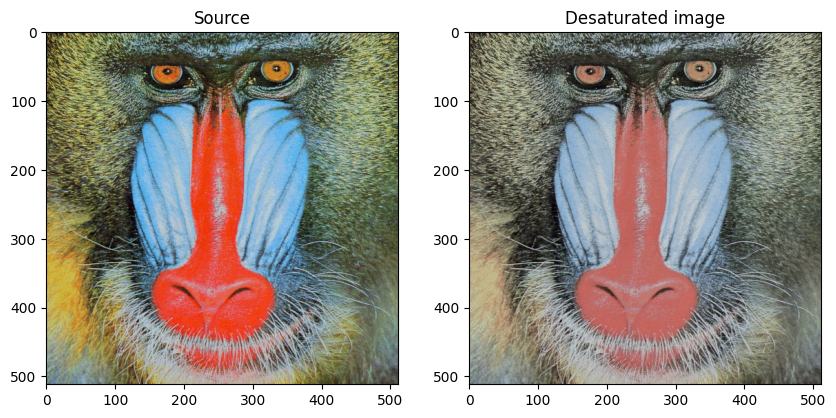

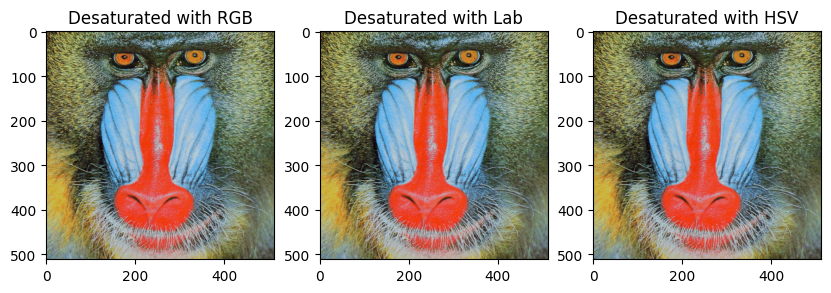

In [4]:
RGB_mandril=io.imread('../standard_test_images/mandril_color.png')/255
Lab_mandril=color.rgb2lab(mandril)
HSV_mandril=color.rgb2hsv(mandril)

mandril_desaturated=io.imread('Images/mandril_desaturated.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title('Source')
axs[0].imshow(RGB_mandril);
axs[1].set_title('Desaturated image')
axs[1].imshow(mandril_desaturated);

# Let's generate a 3 channels version of a grayscale version of the mandril (it might be useful)
h,w,c = RGB_mandril.shape
gray_mandril = np.repeat(np.reshape(color.rgb2gray(RGB_mandril),(h,w,1)),3,2) 

my_mandril_desaturated_RGB = RGB_mandril # MODIFY THIS LINE
my_mandril_desaturated_Lab = Lab_mandril # MODIFY THIS LINE
my_mandril_desaturated_HSV = HSV_mandril # MODIFY THIS LINE

fig, axs = plt.subplots(1, 3, figsize=(10,10))

axs[0].set_title('Desaturated with RGB')
axs[0].imshow(my_mandril_desaturated_RGB);
axs[1].set_title('Desaturated with Lab')
axs[1].imshow(color.lab2rgb(my_mandril_desaturated_Lab));
axs[2].set_title('Desaturated with HSV')
axs[2].imshow(color.hsv2rgb(my_mandril_desaturated_HSV));

**Question 3:**
- Modify the above code in order to match the target "desaturated image" using each of the RGB, Lab and HSV color spaces
- Comment on the advantages and drawbacks of each color space  in this situation

**Answer 3:** YOUR ANSWER HERE

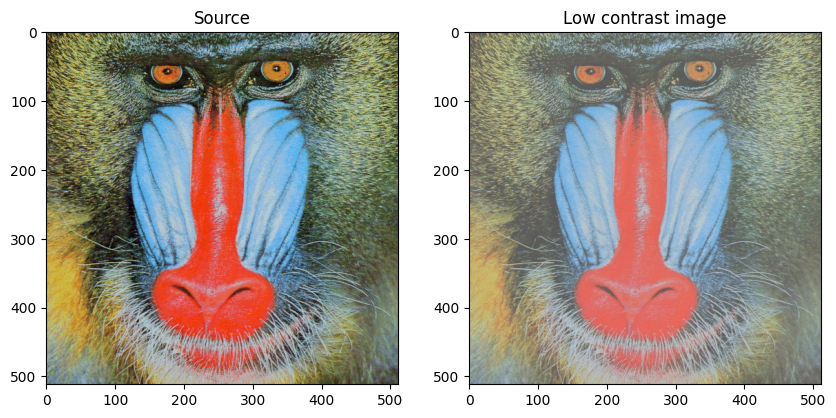

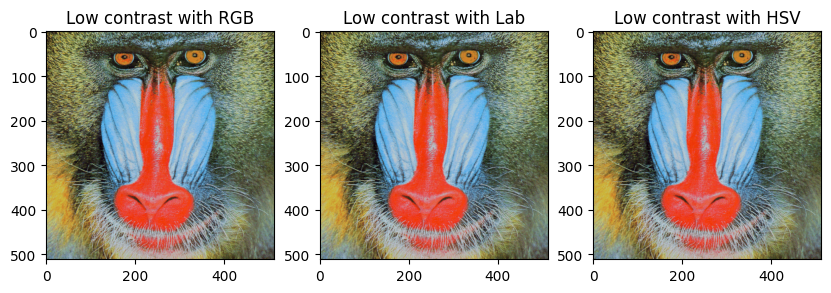

In [5]:
RGB_mandril=io.imread('../standard_test_images/mandril_color.png')/255
Lab_mandril=color.rgb2lab(mandril)
HSV_mandril=color.rgb2hsv(mandril)

mandril_less_contrast=io.imread('Images/mandril_less_contrast.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title('Source')
axs[0].imshow(RGB_mandril);
axs[1].set_title('Low contrast image')
axs[1].imshow(mandril_less_contrast);

my_mandril_low_contrast_RGB = RGB_mandril # MODIFY THIS LINE
my_mandril_low_contrast_Lab = Lab_mandril # MODIFY THIS LINE
my_mandril_low_contrast_HSV = HSV_mandril # MODIFY THIS LINE

fig, axs = plt.subplots(1, 3, figsize=(10,10))

axs[0].set_title('Low contrast with RGB')
axs[0].imshow(my_mandril_low_contrast_RGB);
axs[1].set_title('Low contrast with Lab')
axs[1].imshow(color.lab2rgb(my_mandril_low_contrast_Lab));
axs[2].set_title('Low contrast with HSV')
axs[2].imshow(color.hsv2rgb(my_mandril_low_contrast_HSV));

**Question 4:**
- Modify the above code in order to match the target "less contrast image" using each of the RGB, Lab and HSV color spaces
- Comment on the advantages and drawbacks of each color space  in this situation

**Answer 4:** YOUR ANSWER HERE

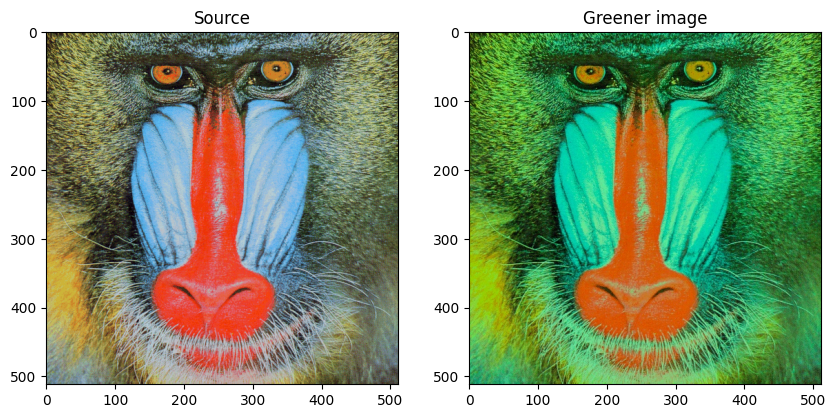

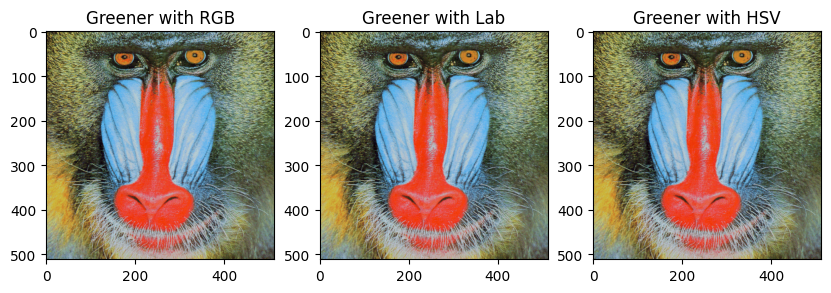

In [216]:
RGB_mandril=io.imread('../standard_test_images/mandril_color.png')/255
Lab_mandril=color.rgb2lab(mandril)
HSV_mandril=color.rgb2hsv(mandril)

mandril_greener=io.imread('Images/mandril_greener.jpg')/255

fig, axs = plt.subplots(1, 2, figsize=(10,10))

axs[0].set_title('Source')
axs[0].imshow(RGB_mandril);
axs[1].set_title('Greener image')
axs[1].imshow(mandril_greener);

my_mandril_greener_RGB = RGB_mandril # MODIFY THIS LINE
my_mandril_greener_Lab = Lab_mandril # MODIFY THIS LINE
my_mandril_greener_HSV = HSV_mandril # MODIFY THIS LINE

fig, axs = plt.subplots(1, 3, figsize=(10,10))

axs[0].set_title('Greener with RGB')
axs[0].imshow(my_mandril_greener_RGB);
axs[1].set_title('Greener with Lab')
axs[1].imshow(color.lab2rgb(my_mandril_greener_Lab));
axs[2].set_title('Greener with HSV')
axs[2].imshow(color.hsv2rgb(my_mandril_greener_HSV));

**Question 5:**
- Modify the above code in order to match the target "greener image" using each of the RGB, Lab and HSV color spaces
- Comment on the advantages and drawbacks of each color space  in this situation

**Answer 5:** YOUR ANSWER HERE

## Unsupervised image pixels clustering

In this section, we examine the possibility of automatically finding color-homogeneous regions in an image. For this purpose, the k-means algorithm is used.

In [6]:
def histogram3dplot(h, e, fig=None):
        """
        Visualize a 3D histogram

        Parameters
        ----------

        h: histogram array of shape (M,N,O)
        e: list of bin edge arrays (for R, G and B)

        Code adapted from : https://staff.fnwi.uva.nl/r.vandenboomgaard/IPCV20172018/LectureNotes/IP/Images/ImageHistograms.html
        """
        M, N, O = h.shape
        idxR = np.arange(M)
        idxG = np.arange(N)
        idxB = np.arange(O)

        R, G, B = np.meshgrid(idxR, idxG, idxB)
        a = np.diff(e[0])[0]
        b = a/2
        R = a * R + b

        a = np.diff(e[1])[0]
        b = a/2
        G = a * G + b

        a = np.diff(e[2])[0]
        b = a/2
        B = a * B + b

        colors = np.vstack((G.flatten(), R.flatten(), B.flatten())).T/255
        h = h / np.sum(h)
        if fig is not None:
            f = plt.figure(fig)
        else:
            f = plt.gcf()
        ax = f.add_subplot(122, projection='3d')   
        ax.set_title('3D color histogram')
        mxbins = np.array([M,N,O]).max()
        ax.scatter(G.flatten(), R.flatten(), B.flatten(), s=h.flatten()*(128/mxbins)**3/2, c=colors)

        ax.set_xlabel('Red')
        ax.set_ylabel('Green')
        ax.set_zlabel('Blue')

In [7]:
# Adapted from a BSD licensed script from 
# Authors: Robert Layton <robertlayton@gmail.com>
#          Olivier Grisel <olivier.grisel@ensta.org>
#          Mathieu Blondel <mathieu@mblondel.org>

@interact( n_colors=widgets.IntSlider(value=5, min=1, max=32, step=1, continuous_update=False),
         color_space=['RGB','Lab'])
def k_means(n_colors, color_space):
    image = io.imread("Images/polytech.jpg")/255
    if color_space == 'Lab':
        image = color.rgb2lab(image)

    # Convert to ndarray
    image = np.array(image, dtype=np.float64)

    # Load Image and transform to a 2D numpy array.
    w, h, d = original_shape = tuple(image.shape)
    assert d == 3
    image_array = np.reshape(image, (w * h, d))

    # Fitting model on a "small" sub-sample of the data (to speed up things)
    image_array_sample = shuffle(image_array, random_state=0)[:10000]
    kmeans = KMeans(n_clusters=n_colors, random_state=0, n_init='auto').fit(image_array_sample)

    labels = kmeans.predict(image_array)
    codebook = kmeans.cluster_centers_

    def recreate_image(codebook, labels, w, h):
        """Recreate the (compressed) image from the code book & labels"""
        d = codebook.shape[1]
        image = np.zeros((w, h, d))
        label_idx = 0
        for i in range(w):
            for j in range(h):
                image[i][j] = codebook[labels[label_idx]]
                label_idx += 1
        return image

    image_regions = recreate_image(codebook, labels, w, h)

    fig=plt.figure(figsize=(12,6))
    if color_space == 'Lab':
        image = color.lab2rgb(image)
    ax=plt.subplot(1,2, 1)
    ax.set_title('Original image')
    ax.imshow(image);
    h, e = np.histogramdd((image*255).reshape(-1,3), bins=8, range=[(0,255),(0,255),(0,255)])
    histogram3dplot(h, e, fig)
    
    fig2=plt.figure(figsize=(12,6))
    if color_space == 'Lab':
        image_regions = color.lab2rgb(image_regions)
    ax=plt.subplot(1,2, 1)
    ax.set_title('Regions')
    ax.imshow(image_regions);
    h, e = np.histogramdd((image_regions*255).reshape(-1,3), bins=8, range=[(0,255),(0,255),(0,255)])
    histogram3dplot(h, e, fig2)
    plt.show()

interactive(children=(IntSlider(value=5, continuous_update=False, description='n_colors', max=32, min=1), Drop…

**Question 6:**
* Try the operation on various images
* Try with different numbers of regions
* For a limited number of colors: think about the color space used and the centers of the groups. Is it necessary to calculate distances between colors?
* Are the regions found spatially related? What are the advantages and disadvantages of this?
* Test the clustering in the LAB color space and compare with the results obtained previously (in RGB). What do you conclude?

**Answer 6:** YOUR ANSWER HERE

## Contour extraction : grayscale vs color gradients

The following block of code tries to extract the contours of each colored object in the image using two methods.

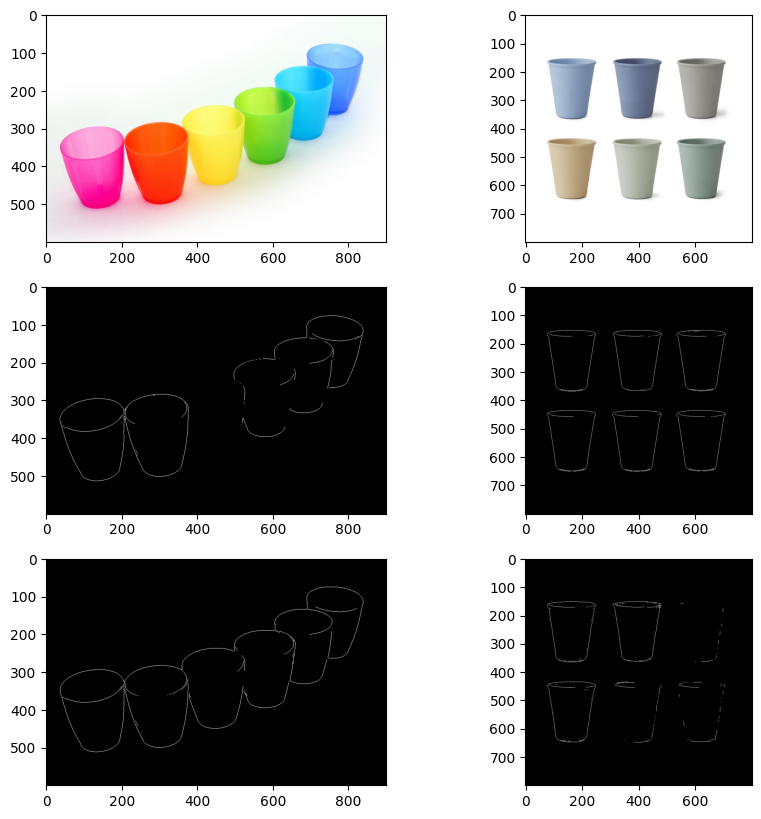

In [8]:
images = ['Images/colorful-objects.jpeg', 'Images/other-objects.jpeg']
fig, axs = plt.subplots(3, len(images), figsize=(10,10))
for i in range(len(images)):
    image=io.imread(images[i])/255
    image_gray = color.rgb2gray(image)
    axs[0][i].imshow(image);

    res = filters.sobel(image_gray)
    bin_res = res > filters.threshold_otsu(res)
    bin_res = morphology.thin(bin_res)
    axs[1][i].imshow(bin_res, cmap='gray');

    saturation = color.rgb2hsv(image)[:,:,1]
    res = filters.sobel(saturation)
    bin_res = res > filters.threshold_otsu(res)
    bin_res = morphology.thin(bin_res)
    axs[2][i].imshow(bin_res, cmap='gray');

**Question 7:** From your understanding of the python code used and the results obtained, explain the two methods used and comment on the results obtained.

**Answer 7:** YOUR ANSWER HERE

**Question 8:** Modify the code provided in order to propose a better color based segmentation that works on both images. Comment your code in order to explain you choices.

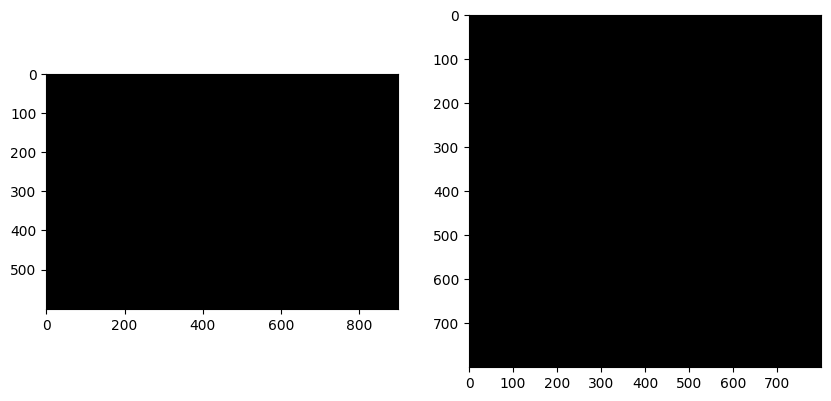

In [11]:
# ADD YOUR ANSWER TO QUESTION 8 BELOW
images = ['Images/colorful-objects.jpeg', 'Images/other-objects.jpeg']
fig, axs = plt.subplots(1, len(images), figsize=(10,10))
for i in range(len(images)):
    image=io.imread(images[i])/255

    # of course you should replace the line below (and more) in order to have 
    # the objects contour in bin_res
    bin_res = np.zeros(image.shape)
    axs[i].imshow(bin_res, cmap='gray');